# **ST3189 Machine Learning**

Big MartData Set - https://www.kaggle.com/datasets/mragpavank/big-mart-sales-dataset

# **Problem Statement**

Determine the most influential variables on item outlet sales for Big Mart. To address this, a few research questions are conducted below:
1.	What are the primary factors influencing the Item Outlet Sales in the dataset?
2.	How do product attributes, store characteristics, and other factors contribute to variations in sales performance?
3.	Which predictive model demonstrates the highest performance in accurately forecasting item outlet sales?


# Importing Library

In [1]:
# manipulation data
import pandas as pd
import numpy as np

# visualiation data
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# Model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Data Analysis

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/coursework/Colab Notebooks/Train.csv')

In [4]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
# Number of data points and features
data.shape

(8523, 12)

In [6]:
# Getting more information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
# Getting informationg of the target variable
data['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [8]:
# Checking for duplicated value
sum(data.duplicated())

0

In [9]:
# Checking for missing values
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

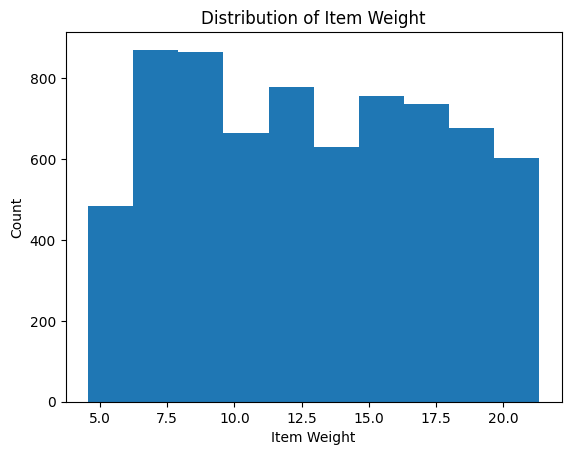

In [10]:
# Check for the mean of Item
plt.hist(data['Item_Weight'])
plt.title("Distribution of Item Weight")
plt.xlabel("Item Weight")
plt.ylabel("Count")
plt.show()

In [11]:
# Filling the missing values in the Item_Weight column with mean value
data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace=True)

In [12]:
# Check for the number of Outlet Size count
data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

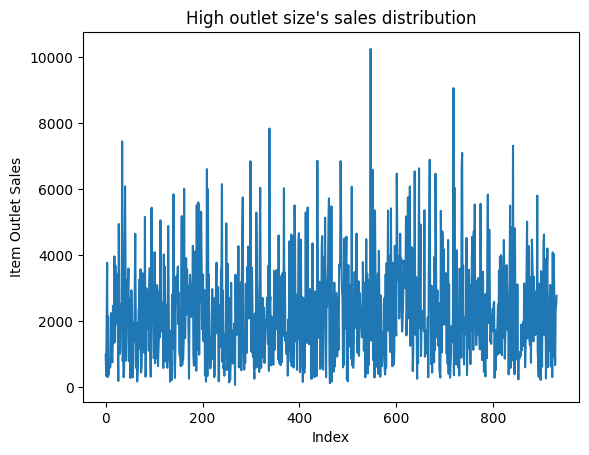

In [13]:
high = data['Outlet_Size'] == 'High'
high_data = data[high].reset_index(drop=True)  # Reset index to ensure meaningful x-axis
plt.plot(high_data.index, high_data['Item_Outlet_Sales'])
plt.title("High outlet size's sales distribution")
plt.xlabel("Index")
plt.ylabel("Item Outlet Sales")
plt.show()

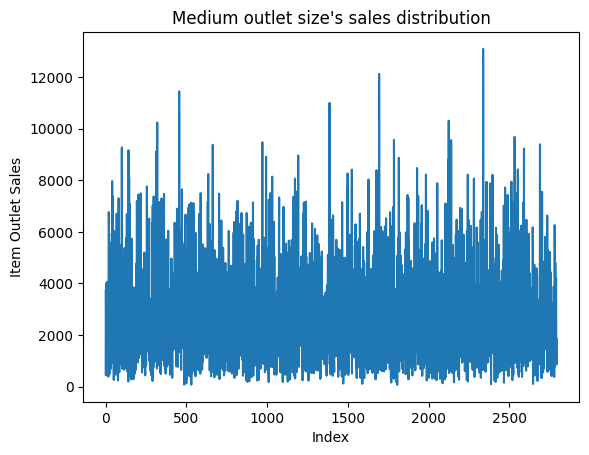

In [14]:
medium = data['Outlet_Size'] == 'Medium'
medium_data = data[medium].reset_index(drop=True)  # Reset index to ensure meaningful x-axis
plt.plot(medium_data.index, medium_data['Item_Outlet_Sales'])
plt.title("Medium outlet size's sales distribution")
plt.xlabel("Index")
plt.ylabel("Item Outlet Sales")
plt.show()

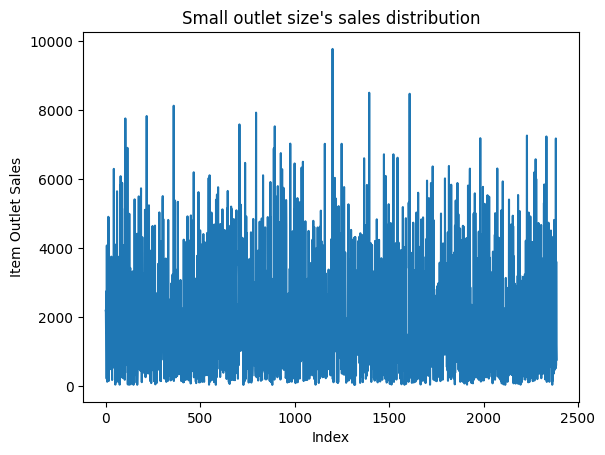

In [15]:
small  = data['Outlet_Size'] == 'Small'
small_data = data[small].reset_index(drop=True)  # Reset index to ensure meaningful x-axis
plt.plot(small_data.index, small_data['Item_Outlet_Sales'])
plt.title("Small outlet size's sales distribution")
plt.xlabel("Index")
plt.ylabel("Item Outlet Sales")
plt.show()

In [16]:
#filling the missing values in the Item_Weight column as a new category
data['Outlet_Size'].fillna('Undefined',inplace=True)

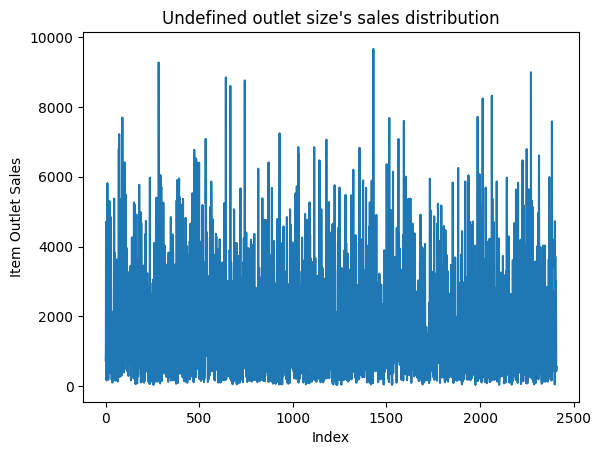

In [17]:
undefined  = data['Outlet_Size'] == 'Undefined'
undefined_data = data[undefined].reset_index(drop=True)  # Reset index to ensure meaningful x-axis
plt.plot(undefined_data.index, undefined_data['Item_Outlet_Sales'])
plt.title("Undefined outlet size's sales distribution")
plt.xlabel("Index")
plt.ylabel("Item Outlet Sales")
plt.show()

In [18]:
# Check for the content of Item Fat Content
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [19]:
# Have a look at the specific text
LF_index_loc = data.loc[data['Item_Fat_Content'] == 'LF']
LF_index_loc

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
45,FDM39,6.420000,LF,0.089499,Dairy,178.1002,OUT010,1998,Undefined,Tier 3,Grocery Store,358.2004
65,FDC46,17.700000,LF,0.195068,Snack Foods,185.4266,OUT010,1998,Undefined,Tier 3,Grocery Store,184.4266
121,DRJ13,12.650000,LF,0.063018,Soft Drinks,159.0578,OUT045,2002,Undefined,Tier 2,Supermarket Type1,2085.9514
175,FDR47,17.850000,LF,0.000000,Breads,196.5794,OUT010,1998,Undefined,Tier 3,Grocery Store,585.2382
207,DRF36,16.100000,LF,0.023625,Soft Drinks,189.3846,OUT045,2002,Undefined,Tier 2,Supermarket Type1,3630.6074
...,...,...,...,...,...,...,...,...,...,...,...,...
8367,FDA32,12.857645,LF,0.052691,Fruits and Vegetables,216.3192,OUT019,1985,Small,Tier 1,Grocery Store,215.7192
8379,FDV39,11.300000,LF,0.007280,Meat,199.3426,OUT046,1997,Small,Tier 1,Supermarket Type1,2372.9112
8391,FDV15,10.300000,LF,0.146172,Meat,103.3648,OUT046,1997,Small,Tier 1,Supermarket Type1,3219.8088
8443,FDX15,17.200000,LF,0.156542,Meat,162.4578,OUT049,1999,Medium,Tier 1,Supermarket Type1,2888.2404


In [20]:
# Replace 'LF' with 'Low Fat'
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace('LF', 'Low Fat')

# Replace 'reg' with 'Regular'
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace('reg', 'Regular')

# Replace 'low fat' with 'Low Fat'
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace('low fat', 'Low Fat')

data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [21]:
# Check for the count of Item Type
data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [22]:
# Check for the Outlet establishent year
data['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [23]:
# Check for the Outlet Type
data['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [24]:
# Check for the Outlet Identifier
data['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [25]:
# Check for the Item Identifier
data['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [26]:
# Check for the Item_Visibility
data['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [27]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Undefined,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Feature Engineering

In [28]:
data["Years_Since_Establishment"] = 2023 - data["Outlet_Establishment_Year"]

In [29]:
#Statistical measurement about data
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Years_Since_Establishment
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914,25.168133
std,4.226124,0.051598,62.275067,8.371760,1706.499616,8.371760
min,4.555000,0.000000,31.290000,1985.000000,33.290000,14.000000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400,19.000000
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000,24.000000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400,36.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,38.000000


In [30]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Since_Establishment
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,24
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,14
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,24
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Undefined,Tier 3,Grocery Store,732.3800,25
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,36


In [31]:
data = data.drop('Outlet_Establishment_Year',axis=1)

# Exploratory Data Analysis (EDA)

In [32]:
# Set the palette
sns.set_palette("pastel")

# Set the plot style to "seaborn-darkgrid"
plt.style.use('seaborn-darkgrid')

<ipython-input-32-3fe96c3b863a>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


array([[<Axes: title={'center': 'Item_Weight'}>,
        <Axes: title={'center': 'Item_Visibility'}>],
       [<Axes: title={'center': 'Item_MRP'}>,
        <Axes: title={'center': 'Item_Outlet_Sales'}>],
       [<Axes: title={'center': 'Years_Since_Establishment'}>, <Axes: >]],
      dtype=object)

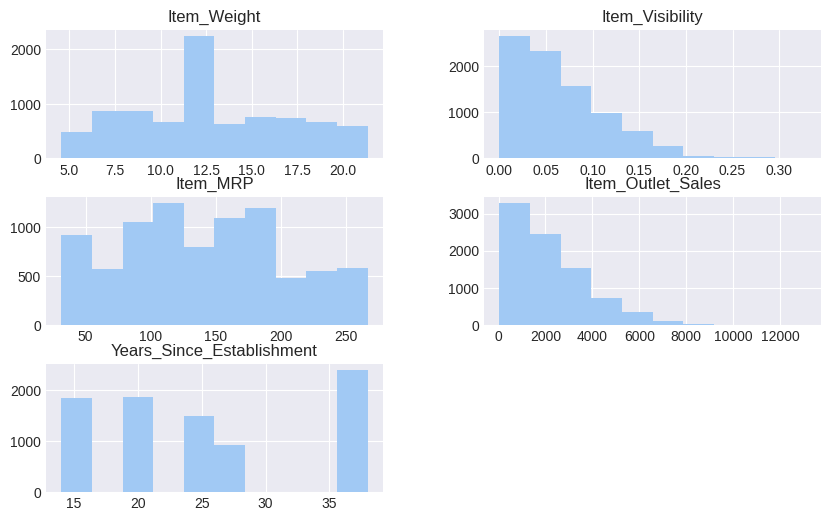

In [33]:
data.hist(figsize=(10,6))

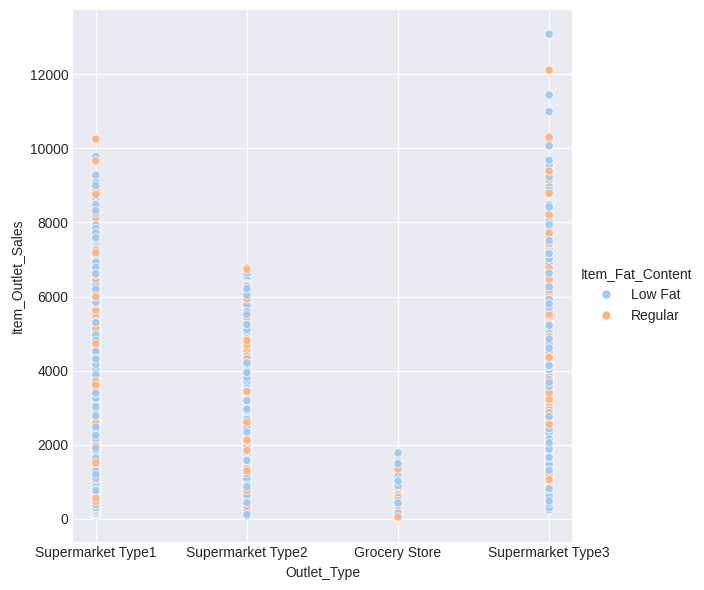

In [34]:
#Check the relationship between Outlet type and sales
sns.relplot(x='Outlet_Type', y='Item_Outlet_Sales', hue='Item_Fat_Content', data=data, height=6, aspect=1)

<ipython-input-35-a361ccab040e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, fmt='.2f')


<Axes: >

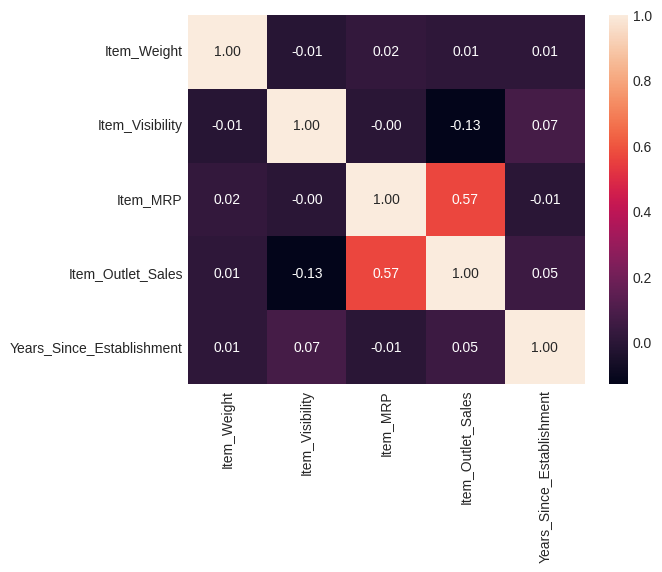

In [35]:
#Plot a correlation heat map to observe relationship between each variable
sns.heatmap(data.corr(), annot=True, fmt='.2f')

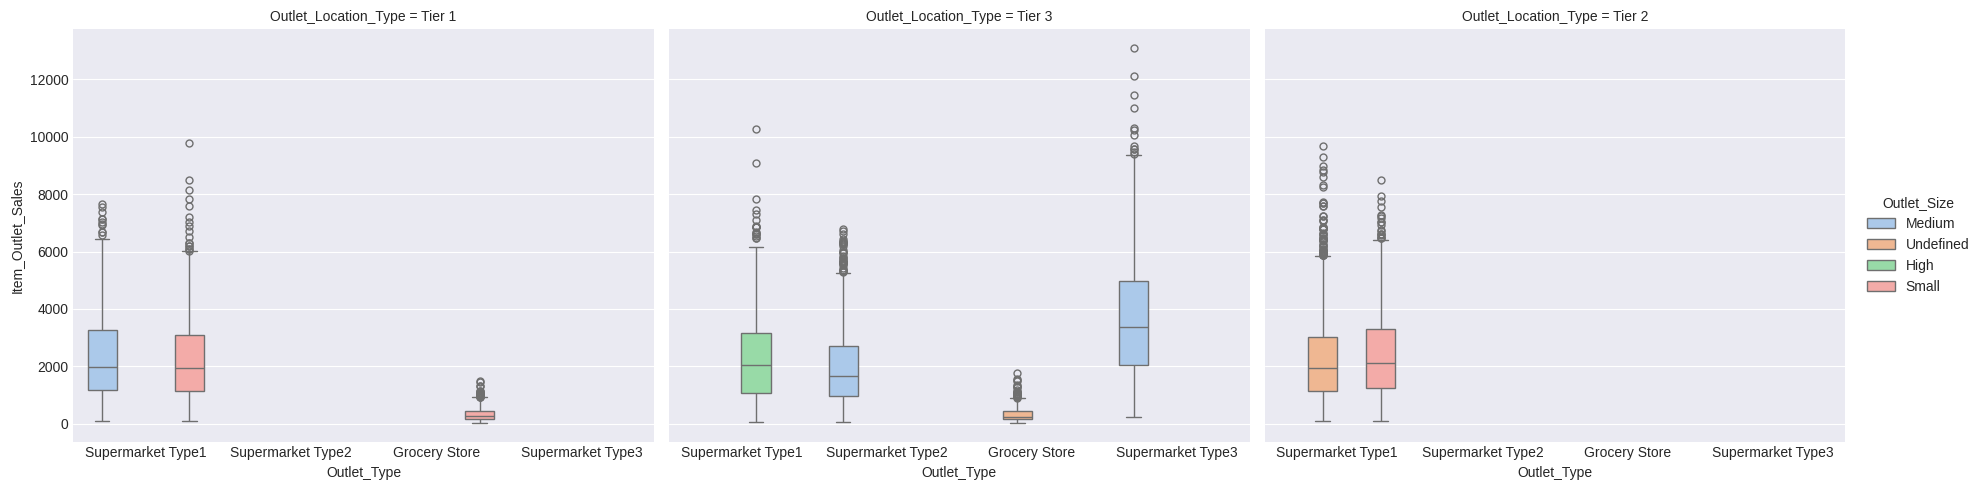

In [36]:
# Create a catplot to examine the relationship between outlet and sales
sns.catplot(x='Outlet_Type', y='Item_Outlet_Sales', hue='Outlet_Size', col='Outlet_Location_Type', kind='box', data=data, height=5, aspect=1.25)
plt.show()

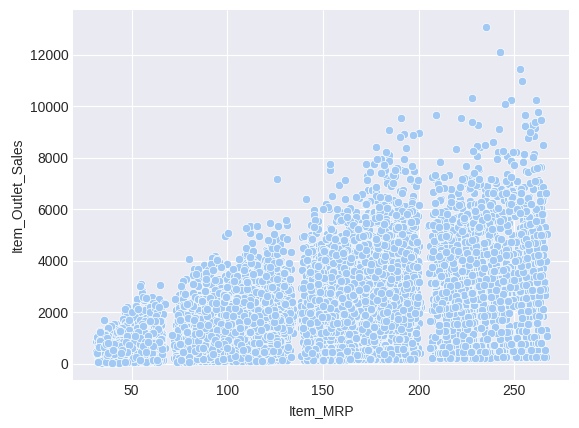

In [37]:
# Create a scatter plot using Seaborn
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data = data)

# Show the plot
plt.show()

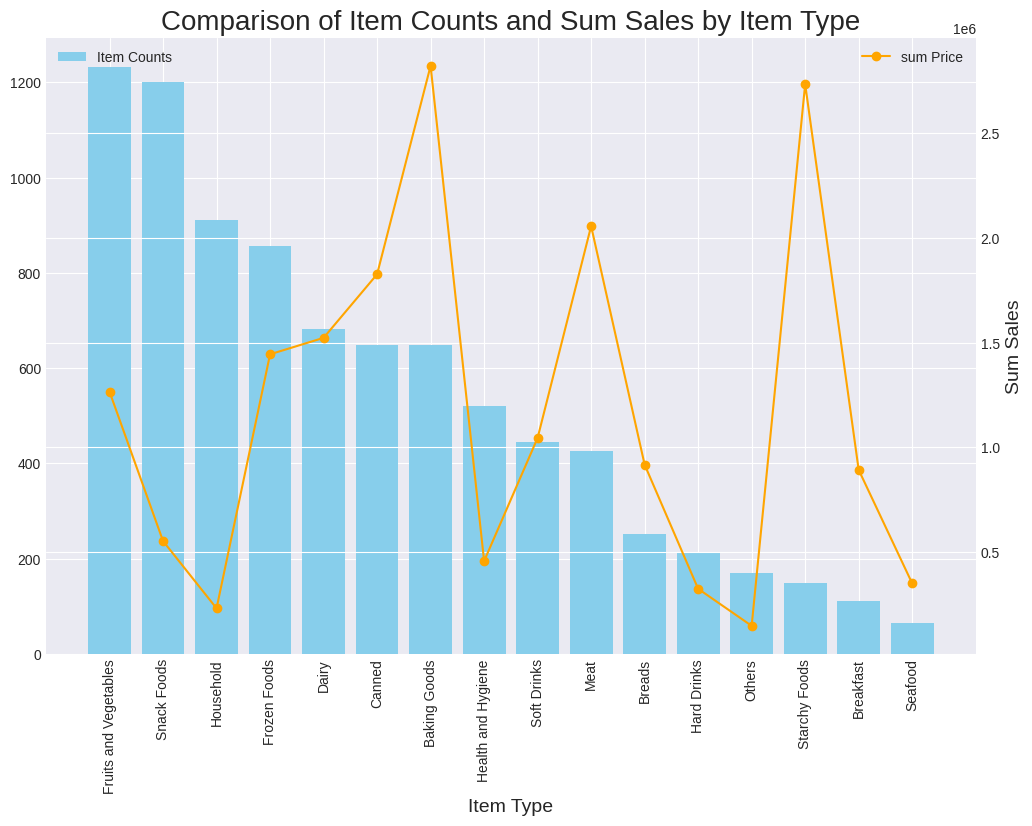

In [38]:
# Calculate item counts and mean price
item_counts = data["Item_Type"].value_counts()
sum_sales = data.groupby("Item_Type")["Item_Outlet_Sales"].sum()

# Create the bar plot
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.bar(item_counts.index, item_counts.values, color='skyblue', label='Item Counts')

# Creating a secondary y-axis for mean price
ax2 = ax1.twinx()
ax2.plot(sum_sales.index, sum_sales.values, color='orange', marker='o', label='sum Price')

# Set title and axis labels
ax1.set_title('Comparison of Item Counts and Sum Sales by Item Type', fontsize=20)
ax1.set_xlabel('Item Type', fontsize=14)
ax2.set_ylabel('Sum Sales', fontsize=14)
ax1.set_xticks(range(len(item_counts)))  # Set tick positions
ax1.set_xticklabels(item_counts.index, rotation=90)  # Rotate x-axis labels for better readability

# Show plot
ax1.legend(loc='upper left')
ax2.legend(loc='upper right');

plt.show()

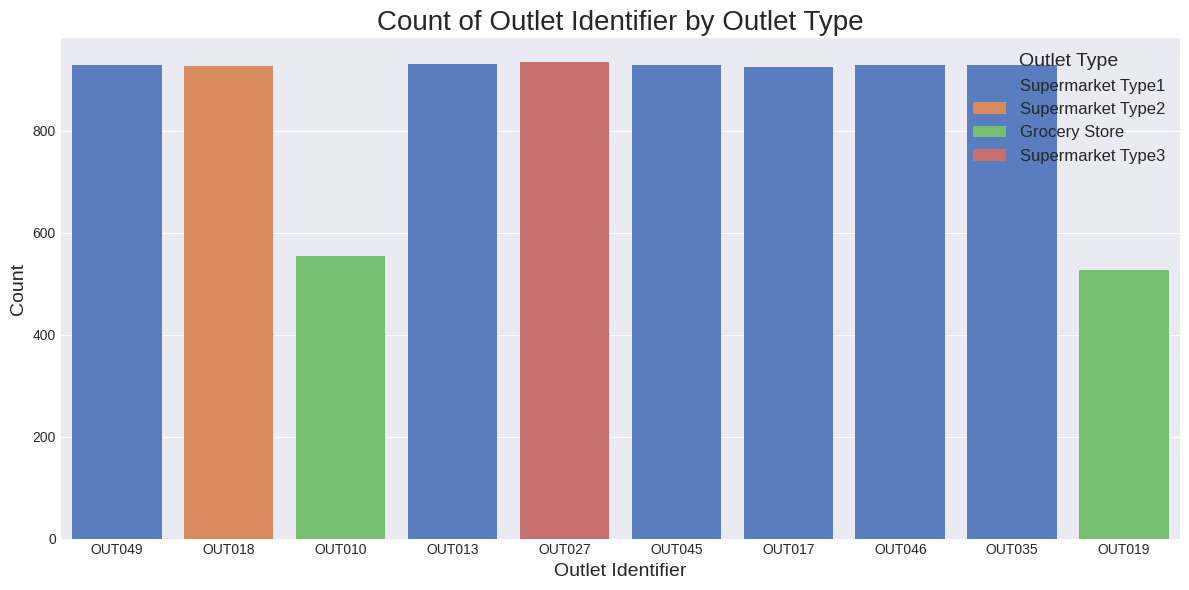

In [39]:
# Create the stacked bar plot
plt.figure(figsize=(12, 6))
sns.countplot(x='Outlet_Identifier', hue='Outlet_Type', data=data, palette='muted')

# Set title and axis labels
plt.title('Count of Outlet Identifier by Outlet Type', fontsize=20)
plt.xlabel('Outlet Identifier', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show plot
plt.legend(title='Outlet Type', title_fontsize='14', fontsize='12', loc='upper right')
plt.tight_layout()
plt.show()

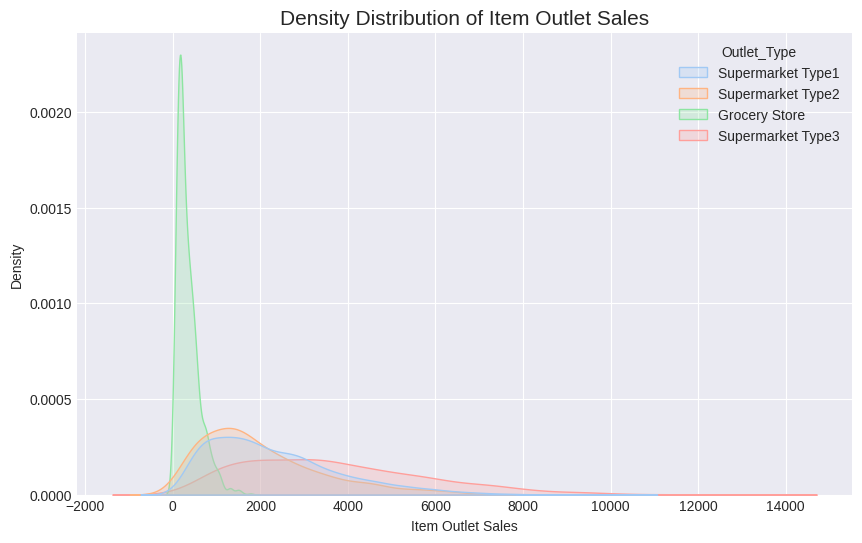

In [40]:
# Convert data to DataFrame
df = pd.DataFrame(data)

# Reshape data into long-form
df_long = pd.melt(df, id_vars=['Outlet_Type'], value_vars=['Item_Outlet_Sales'], var_name='Variable', value_name='Value')

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.kdeplot(data=df_long, x='Value', hue='Outlet_Type', fill=True, common_norm=False, ax=ax)
ax.set_xlabel('Item Outlet Sales')
ax.set_title('Density Distribution of Item Outlet Sales', fontsize=15)
plt.show()

# Data Selection

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Size                8523 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
 11  Years_Since_Establishment  8523 non-null   int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [42]:
# Dropping feature base on own knowledge
data = data.drop('Item_Identifier',axis=1)
data = data.drop('Outlet_Identifier',axis=1)
data = data.drop('Item_Fat_Content',axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Visibility            8523 non-null   float64
 2   Item_Type                  8523 non-null   object 
 3   Item_MRP                   8523 non-null   float64
 4   Outlet_Size                8523 non-null   object 
 5   Outlet_Location_Type       8523 non-null   object 
 6   Outlet_Type                8523 non-null   object 
 7   Item_Outlet_Sales          8523 non-null   float64
 8   Years_Since_Establishment  8523 non-null   int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 599.4+ KB


# Label Encoding

Convert categorical data into numeric data

In [43]:
le = LabelEncoder()
le_item_type = LabelEncoder()
le_outlet_size = LabelEncoder()
le_outlet_type = LabelEncoder()
le_outlet_location_type = LabelEncoder()

In [44]:
data['Item_Type']=le_item_type.fit_transform(data['Item_Type'])
data['Outlet_Size']=le_outlet_size.fit_transform(data['Outlet_Size'])
data['Outlet_Type']=le_outlet_type.fit_transform(data['Outlet_Type'])
data['Outlet_Location_Type']=le_outlet_location_type.fit_transform(data['Outlet_Location_Type'])

In [45]:
le_outlet_type_mapping = dict(zip(le_outlet_type.classes_, le_outlet_type.transform(le_outlet_type.classes_)))
print(le_outlet_type_mapping)

{'Grocery Store': 0, 'Supermarket Type1': 1, 'Supermarket Type2': 2, 'Supermarket Type3': 3}


In [46]:
le_outlet_size_mapping = dict(zip(le_outlet_size.classes_, le_outlet_size.transform(le_outlet_size.classes_)))
print(le_outlet_size_mapping)

{'High': 0, 'Medium': 1, 'Small': 2, 'Undefined': 3}


In [47]:
le_item_type_mapping = dict(zip(le_item_type.classes_, le_item_type.transform(le_item_type.classes_)))
print(le_item_type_mapping)

{'Baking Goods': 0, 'Breads': 1, 'Breakfast': 2, 'Canned': 3, 'Dairy': 4, 'Frozen Foods': 5, 'Fruits and Vegetables': 6, 'Hard Drinks': 7, 'Health and Hygiene': 8, 'Household': 9, 'Meat': 10, 'Others': 11, 'Seafood': 12, 'Snack Foods': 13, 'Soft Drinks': 14, 'Starchy Foods': 15}


In [48]:
le_outlet_location_type_mapping = dict(zip(le_outlet_location_type.classes_, le_outlet_location_type.transform(le_outlet_location_type.classes_)))
print(le_outlet_location_type_mapping)

{'Tier 1': 0, 'Tier 2': 1, 'Tier 3': 2}


In [49]:
data.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Since_Establishment
0,9.30,0.016047,4,249.8092,1,0,1,3735.1380,24
1,5.92,0.019278,14,48.2692,1,2,2,443.4228,14
2,17.50,0.016760,10,141.6180,1,0,1,2097.2700,24
3,19.20,0.000000,6,182.0950,3,2,0,732.3800,25
4,8.93,0.000000,9,53.8614,0,2,1,994.7052,36


In [50]:
print(data.shape)

(8523, 9)


# Unsupervised Learning

In [ ]:
data

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Since_Establishment
0,9.300,0.016047,4,249.8092,1,0,1,3735.1380,24
1,5.920,0.019278,14,48.2692,1,2,2,443.4228,14
2,17.500,0.016760,10,141.6180,1,0,1,2097.2700,24
3,19.200,0.000000,6,182.0950,3,2,0,732.3800,25
4,8.930,0.000000,9,53.8614,0,2,1,994.7052,36
...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,13,214.5218,0,2,1,2778.3834,36
8519,8.380,0.046982,0,108.1570,3,1,1,549.2850,21
8520,10.600,0.035186,8,85.1224,2,1,1,1193.1136,19
8521,7.210,0.145221,13,103.1332,1,2,2,1845.5976,14


In [ ]:
PCA_X=data.drop(columns=['Item_Outlet_Sales'], axis=1)
un_y = data['Item_Outlet_Sales']

Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
un_X = sc.fit_transform(PCA_X)

# Principle Component Analysis (PCA)

PCA is a technique to reduce the dimensionality of datasets.

In [ ]:
# PCA

In [ ]:
un_X.shape

(8523, 8)

In [ ]:
pca=PCA(n_components=8)
pca.fit(un_X)

PCA(n_components=8)

In [ ]:
pca.n_features_

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


8

In [ ]:
# loadings
loadings = pca.components_
loadings.shape

(8, 8)

In [ ]:
# let's look at the first 2 PC loadings
loadings[0:2]

array([[ 0.01540051, -0.13290491,  0.00598663, -0.00070006, -0.57103758,
         0.46726632,  0.54513393,  0.37479333],
       [-0.04341062,  0.60736406, -0.19406912, -0.06661896, -0.22836118,
        -0.24597678, -0.3024933 ,  0.61884401]])

In [ ]:
# scores
scores= pca.fit_transform(un_X)
scores.shape

(8523, 8)

In [ ]:
print(pca.explained_variance_ratio_)

[0.24743399 0.14416004 0.1321627  0.12211423 0.1211863  0.11572508
 0.06558732 0.05163033]


In [ ]:
pca.explained_variance_ratio_.shape

(8,)

In [ ]:
print(pca.singular_values_)

[129.8885639   99.14337342  94.92829545  91.24821614  90.90086171
  88.82904458  66.87305804  59.33264312]


In [ ]:
# Find the contribution of each eigenvalue
cov=pca.get_covariance()

In [ ]:
from numpy import linalg
eigval , eigvec = linalg.eig(cov)
eigval

array([1.97970418, 0.41309112, 0.52476014, 1.15341569, 1.05742564,
       0.92590931, 0.96960416, 0.97702851])

In [ ]:
eigval/sum(eigval)

array([0.24743399, 0.05163033, 0.06558732, 0.14416004, 0.1321627 ,
       0.11572508, 0.1211863 , 0.12211423])

In [ ]:
# Find the PVE by checking the propotional variance in the scores as var(sum pca) = sum var
scores = pca.fit_transform(un_X)
score_var = np.var(scores,axis=0)
score_var

array([1.9794719 , 1.15328036, 1.05730157, 0.97691387, 0.9694904 ,
       0.92580068, 0.52469857, 0.41304265])

In [ ]:
score_var/ sum(score_var)

array([0.24743399, 0.14416004, 0.1321627 , 0.12211423, 0.1211863 ,
       0.11572508, 0.06558732, 0.05163033])

In [ ]:
PVE=pd.DataFrame({'Principal Component':range(1,pca.n_components+1), 'PVE':pca.explained_variance_ratio_ })
PVE['cum_PVE']= np.cumsum(PVE['PVE'])
PVE.head(8)

,Principal Component,PVE,cum_PVE
0,1,0.247434,0.247434
1,2,0.144160,0.391594
2,3,0.132163,0.523757
3,4,0.122114,0.645871
4,5,0.121186,0.767057
5,6,0.115725,0.882782
6,7,0.065587,0.948370
7,8,0.051630,1.000000


Text(0, 0.5, 'Percentage of Explained Variance Ratio')

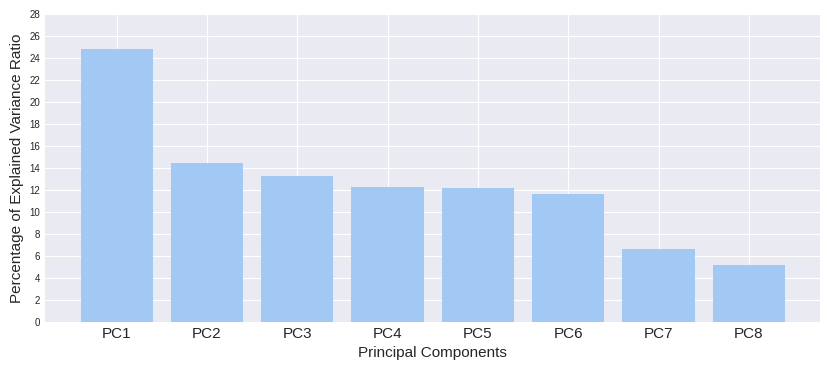

In [ ]:
from matplotlib import pyplot as plt
pca.explained_variance_
pca.explained_variance_ratio_

plt.figure (figsize = (10 , 4), dpi = 100)

plt.bar(range(8), pca.explained_variance_ratio_ * 100, tick_label=["PC" + str(x) for x in range(1, 9)])

plt.xticks (fontsize = 11)
plt.yticks (range (0 , 30 , 2) , fontsize=7)

plt.xlabel('Principal Components' , size = 11)
plt.ylabel('Percentage of Explained Variance Ratio', size = 11)

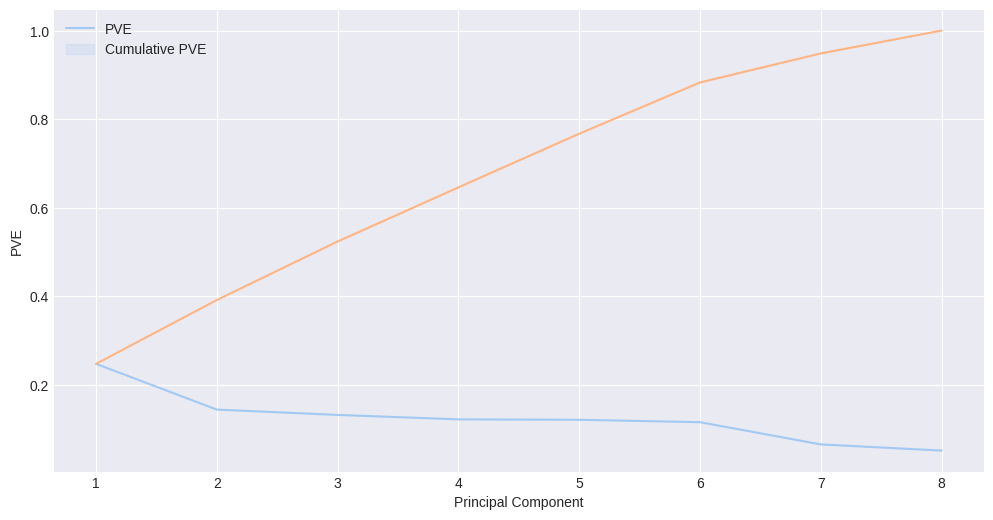

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Principal Component', y='PVE', data=PVE)
sns.lineplot(x='Principal Component', y='cum_PVE', data=PVE)
plt.legend(['PVE','Cumulative PVE'])
plt.show()

It seems that the optimal number of PC is 5. With 5 PCs, almost 76.71% of variations are explained.

In [ ]:
### PCA with 5 components:

PCA_5 = PCA(n_components=5)
X_PCA_5 = PCA_5.fit_transform(un_X)
PC = pd.DataFrame(X_PCA_5, columns=['PC1 PC2 PC3 PC4 PC5'.split()])
PC

,PC1,PC2,PC3,PC4,PC5
0,-0.294524,-0.023802,-0.315070,1.498878,-0.365307
1,1.087992,-1.920829,1.216200,0.077134,2.235551
2,-0.256728,-0.260502,-1.236581,-1.040183,0.378489
3,-0.857955,-0.947490,-0.966167,-0.632667,-1.172281
4,2.019248,0.282865,0.816637,-0.607416,1.657465
...,...,...,...,...,...
8518,1.869335,0.616244,-0.874936,1.743203,1.455784
8519,-1.095659,-0.300429,1.985173,0.312072,-0.621159
8520,-0.557773,-0.723230,0.778853,-0.360018,0.721225
8521,0.766235,-0.464105,0.720140,0.887187,1.217871


In [ ]:
# Taking out the list of columns:

list_cols = PCA_X.columns
PC_with_all_variables = pd.DataFrame(PCA_5.components_.T, columns = ['PC_'+str(i) for i in range(1,6)], index = list_cols)
PC_with_all_variables

,PC_1,PC_2,PC_3,PC_4,PC_5
Item_Weight,0.015401,-0.043411,-0.555585,-0.666481,-0.486329
Item_Visibility,-0.132905,0.607364,0.011779,0.155937,-0.149945
Item_Type,0.005987,-0.194069,-0.568627,0.000047,0.728686
Item_MRP,-0.000700,-0.066619,-0.556484,0.718323,-0.374684
Outlet_Size,-0.571038,-0.228361,0.074483,0.032456,-0.078752
Outlet_Location_Type,0.467266,-0.245977,0.128431,0.101461,-0.173466
Outlet_Type,0.545134,-0.302493,0.102219,0.039689,-0.078459
Years_Since_Establishment,0.374793,0.618844,-0.160263,-0.050748,0.164869


In [ ]:
# Exporting the output:
PC_with_all_variables.to_csv('PC_with_all_variables.csv')

# Variance explained by each of the Component:
pd.Series(PCA_5.explained_variance_ratio_*100, index = ['PC_' + str(i) for i in range(1,6)])

PC_1    24.743399
PC_2    14.416004
PC_3    13.216270
PC_4    12.211423
PC_5    12.118630
dtype: float64

# K-Means Clustering

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)

kmeans.fit(X_PCA_5)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

Scatter plot for Principal Components 0 and 1


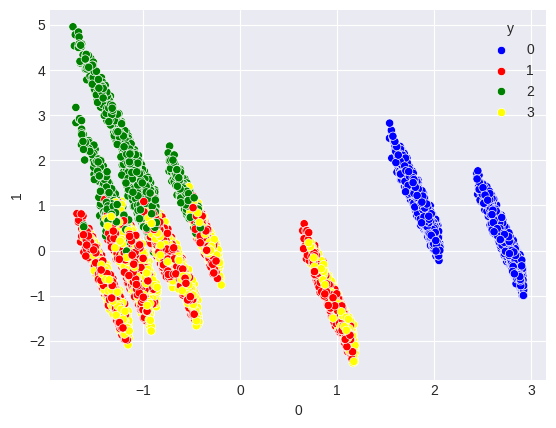

Scatter plot for Principal Components 1 and 2


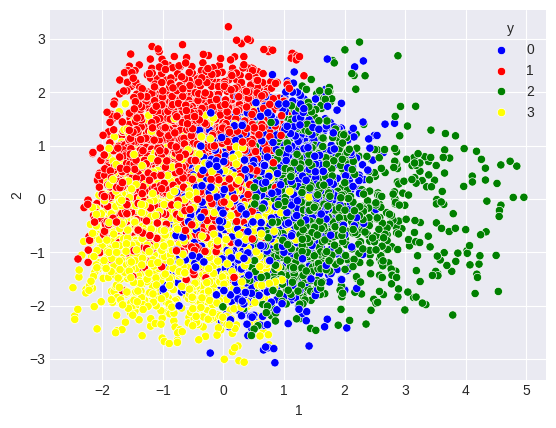

Scatter plot for Principal Components 2 and 3


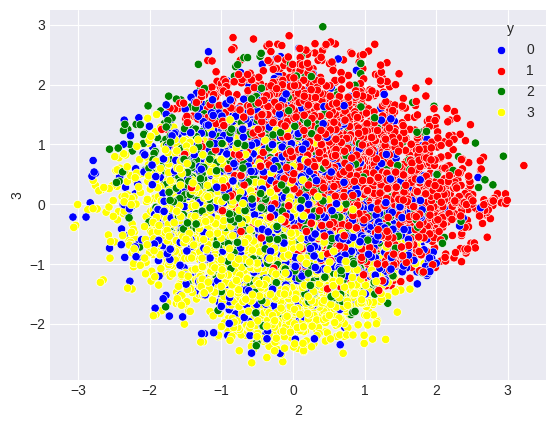

Scatter plot for Principal Components 3 and 4


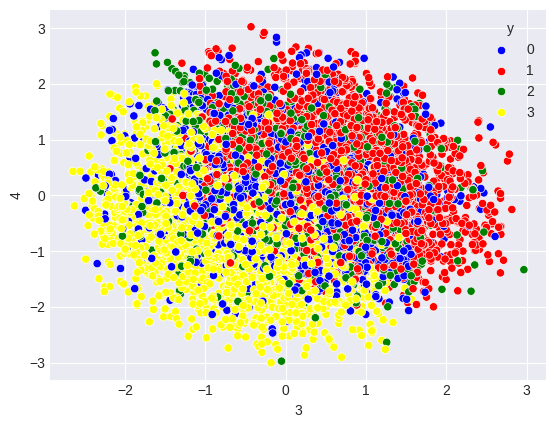

In [ ]:
# Taking into each dataframes
df_pca = pd.DataFrame(X_PCA_5)
y_lab = pd.Series(kmeans.labels_, name = 'y') # labels for clusters

#concatenating the dataframe:
df_final = pd.concat([df_pca, y_lab], axis = 1)

# As there are 5 dimensions, hence we need to plot for each of the different pairs to visualize the spread of the data:

for i in range(4):
    print('Scatter plot for Principal Components', i, 'and', i+1)
    sns.scatterplot(x= df_pca[i], y= df_pca[i+1], hue = df_final['y'], palette = ['blue', 'red', 'green', 'yellow'])
    plt.show()

In [ ]:
kmeans.cluster_centers_

array([[ 2.31892001e+00,  5.06881016e-01, -8.36924691e-02,
         1.58743293e-03,  7.57508839e-02],
       [-5.71094573e-01, -5.00958366e-01,  6.53103054e-01,
         5.84732258e-01,  3.92329208e-01],
       [-1.04435455e+00,  1.58379463e+00, -2.28495182e-01,
         3.23348784e-02,  1.60000138e-01],
       [-5.51254257e-01, -5.64797561e-01, -5.44756880e-01,
        -6.54487941e-01, -5.58062397e-01]])

In [ ]:
kmeans.inertia_

28693.394992766676

Tuning Hyperparameter K

In [ ]:
# Elbow Method: Plotting WCSS against K
from sklearn.metrics import silhouette_score

In [ ]:
WCSS=[] # for elbow method
silhouette_coefficients = [] # for Silhouette method
K= 15
for i in range(2,K+1):  # Notice you start at 2 clusters for silhouette coefficient
    kmeans= KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_PCA_5)
    WCSS.append(kmeans.inertia_)
    scores = silhouette_score(X_PCA_5, kmeans.labels_)
    silhouette_coefficients.append(scores)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
optimal_k = pd.DataFrame({'K':range(2,K+1), 'WCSS':WCSS, 'silhouette_score':silhouette_coefficients})
optimal_k

,K,WCSS,silhouette_score
0,2,37506.063324,0.295984
1,3,32733.790002,0.212317
2,4,28693.394993,0.229966
3,5,25847.635972,0.230642
4,6,23636.589820,0.219640
5,7,21880.966251,0.219068
6,8,20549.984559,0.202399
7,9,19376.085693,0.197584
8,10,18355.654359,0.197745
9,11,17470.103416,0.199591


Elbow method

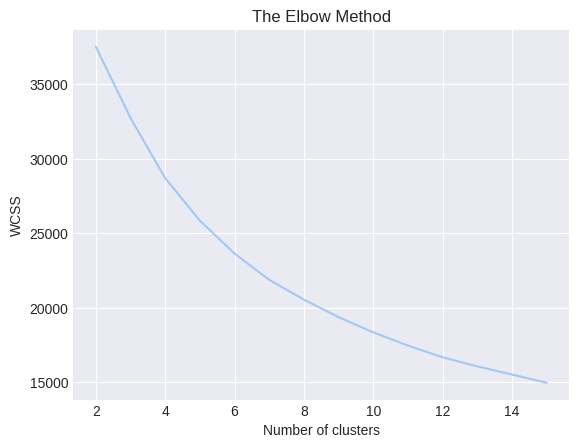

In [ ]:
sns.lineplot(x='K', y='WCSS', data=  optimal_k)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

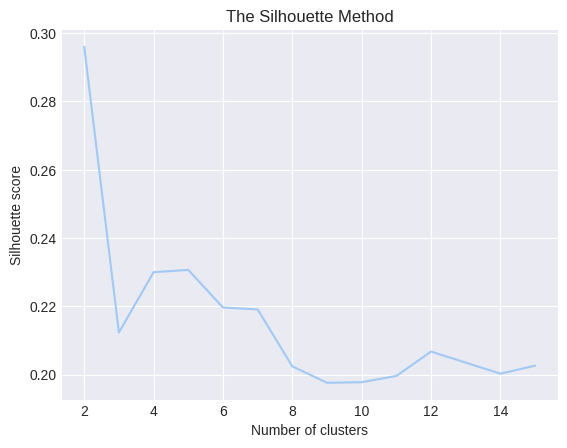

In [ ]:
sns.lineplot(x='K', y='silhouette_score', data=  optimal_k)
plt.title('The Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

From the elbow method and inertia(WCSS), it did not show a clear "kink". Therefor we need to decide the k value through Silhouette score graph.

From the Silhouette score, it seems that the optimal number of clusters is k = 2.

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_fit = kmeans.fit(X_PCA_5)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans_fit.cluster_centers_

array([[-0.91705716,  0.04349855, -0.03635589, -0.0303386 ,  0.04364581],
       [ 1.87939298, -0.08914479,  0.07450681,  0.06217514, -0.08944659]])

In [ ]:
kmeans.labels_ # assigned clusters to the data。

array([0, 1, 0, ..., 0, 1, 0], dtype=int32)

In [ ]:
kmeans_fit.predict(X_PCA_5) # assigning the clusters。

array([0, 1, 0, ..., 0, 1, 0], dtype=int32)

In [ ]:
#Total WCSS (within-clusters sum of squares)
kmeans_fit.inertia_

37506.063323619936

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [ ]:
silhouette_score(X_PCA_5, kmeans.labels_)

0.2959842398510281

At k = 2, silhouette score is 0.2960, within-cluster sum of squares is 37506.0633.

In [ ]:
# Merge cluster labels with original data
data_with_clusters = pd.concat([data, pd.Series(kmeans.labels_, name='Cluster')], axis=1)

# Calculate mean or median of target variable by cluster
mean_sales_by_cluster = data_with_clusters.groupby('Cluster')['Item_Outlet_Sales'].mean()
median_sales_by_cluster = data_with_clusters.groupby('Cluster')['Item_Outlet_Sales'].median()

# Print or visualize the results
print("Mean Sales by Cluster:")
print(mean_sales_by_cluster)

print("\nMedian Sales by Cluster:")
print(median_sales_by_cluster)

Mean Sales by Cluster:
Cluster
0    1945.306032
1    2664.906068
Name: Item_Outlet_Sales, dtype: float64

Median Sales by Cluster:
Cluster
0    1579.6105
1    2251.0698
Name: Item_Outlet_Sales, dtype: float64


Cluster 1 has higher Item Outlet Sales than cluster 0

<ipython-input-244-7a9a8885cc6b>:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  outlet_type_percentage = outlet_type_freq.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack()


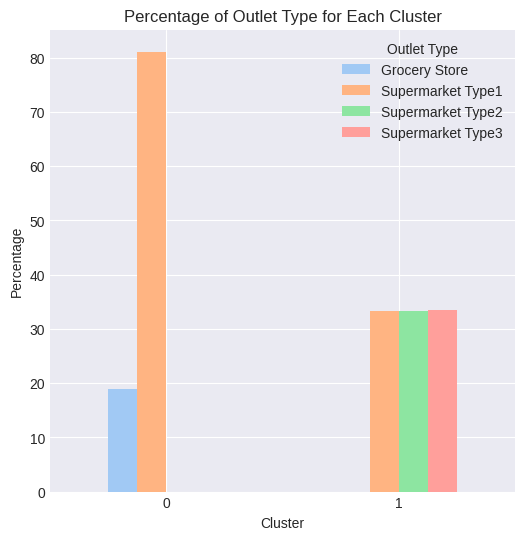

In [ ]:
# Calculate the frequency of each outlet type within each cluster
outlet_type_freq = data_with_clusters.groupby(['Cluster', 'Outlet_Type']).size()

# Convert frequencies into percentages
outlet_type_percentage = outlet_type_freq.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack()

# Dictionary mapping numerical values to outlet type names
outlet_type_names = {0: 'Grocery Store', 1: 'Supermarket Type1', 2: 'Supermarket Type2', 3: 'Supermarket Type3'}

# Replace numerical labels with names
outlet_type_percentage.rename(columns=outlet_type_names, inplace=True)

# Plot the results without stacking
outlet_type_percentage.plot(kind='bar', stacked=False, figsize=(6, 6))
plt.title('Percentage of Outlet Type for Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Outlet Type')
plt.show()

<ipython-input-245-310360cdcdc7>:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  outlet_size_percentage = outlet_size_freq.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack()


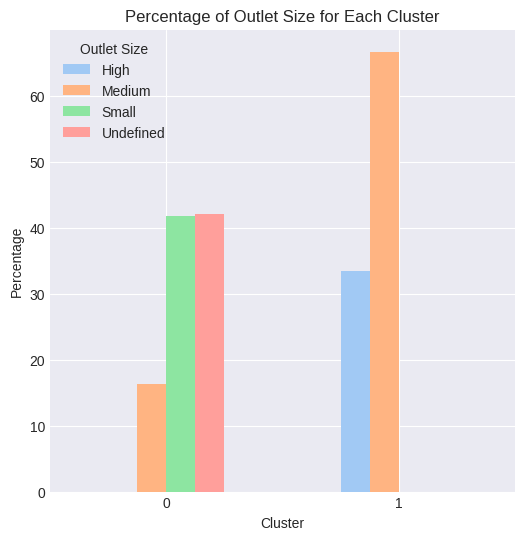

In [ ]:
# Calculate the frequency of each outlet type within each cluster
outlet_size_freq = data_with_clusters.groupby(['Cluster', 'Outlet_Size']).size()

# Convert frequencies into percentages
outlet_size_percentage = outlet_size_freq.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack()

# Dictionary mapping numerical values to outlet type names
outlet_size_names = {0: 'High', 1: 'Medium', 2: 'Small', 3: 'Undefined'}

# Replace numerical labels with names
outlet_size_percentage.rename(columns=outlet_size_names, inplace=True)

# Plot the results without stacking
outlet_size_percentage.plot(kind='bar', stacked=False, figsize=(6, 6))
plt.title('Percentage of Outlet Size for Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Outlet Size')
plt.show()

<ipython-input-246-b3e6175af6b3>:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  item_type_percentage = item_type_freq.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack()


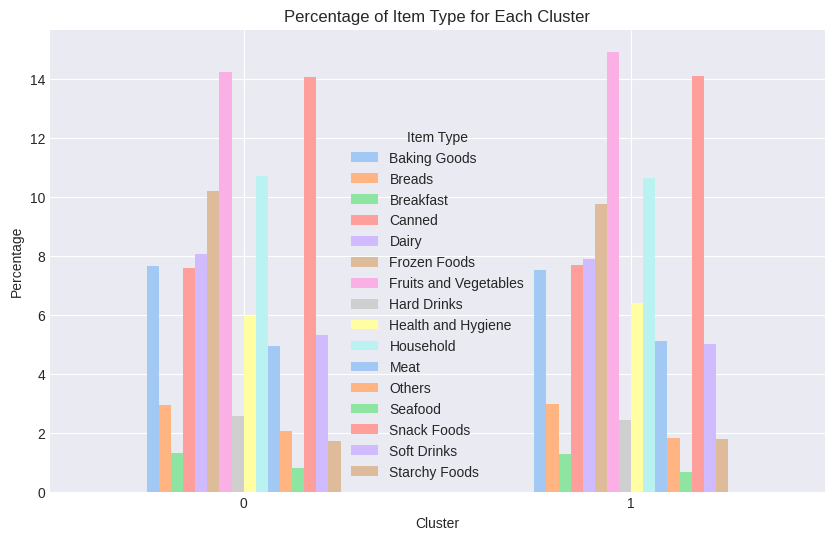

In [ ]:
# Calculate the frequency of each Item Type within each cluster
item_type_freq = data_with_clusters.groupby(['Cluster', 'Item_Type']).size()

# Convert frequencies into percentages
item_type_percentage = item_type_freq.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack()

# Dictionary mapping numerical values to item type names
item_type_names = {0: 'Baking Goods', 1: 'Breads', 2: 'Breakfast', 3: 'Canned', 4: 'Dairy', 5: 'Frozen Foods', 6: 'Fruits and Vegetables', 7: 'Hard Drinks', 8: 'Health and Hygiene', 9: 'Household', 10: 'Meat', 11: 'Others', 12: 'Seafood', 13: 'Snack Foods', 14: 'Soft Drinks', 15: 'Starchy Foods'}

# Replace numerical labels with names
item_type_percentage.rename(columns=item_type_names, inplace=True)

# Plot the results without stacking
item_type_percentage.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Percentage of Item Type for Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Item Type')
plt.show()

# Supervised Learning

# Regression

In [ ]:
reg_X=data.drop(columns=['Item_Outlet_Sales'],axis=1)
reg_y=data['Item_Outlet_Sales']

In [ ]:
#Split the data into train set and test set
reg_X_train, reg_X_test, reg_y_train, reg_y_test = train_test_split(reg_X, reg_y, test_size=0.3, random_state=42)

In [ ]:
#Check the shape of the data
print(reg_X.shape,reg_X_train.shape,reg_X_test.shape)

(8523, 8) (5966, 8) (2557, 8)


In [ ]:
reg_X.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_Since_Establishment
0,9.30,0.016047,4,249.8092,1,0,1,24
1,5.92,0.019278,14,48.2692,1,2,2,14
2,17.50,0.016760,10,141.6180,1,0,1,24
3,19.20,0.000000,6,182.0950,3,2,0,25
4,8.93,0.000000,9,53.8614,0,2,1,36


# Linear Regression

In [ ]:
# Linear Regression
# Fitting LR to the training set
reg_lin = LinearRegression()
reg_lin.fit(reg_X_train, reg_y_train)

LinearRegression()

In [ ]:
# Make predictions on the training set
lin_pred_train = reg_lin.predict(reg_X_train)

# Make Prediction on test set
lin_pred_test = reg_lin.predict(reg_X_test)

In [ ]:
# Calculate the RMSE of train set
lin_mse_train = round(mean_squared_error(reg_y_train, lin_pred_train), 4)
lin_rmse_train = round(np.sqrt(lin_mse_train), 4)

# Calculate the RMSE of test set
lin_mse_test = round(mean_squared_error(reg_y_test, lin_pred_test), 4)
lin_rmse_test = round(np.sqrt(lin_mse_test), 4)

print("RMSE of train set in Linear Regression:", lin_rmse_train)
print("RMSE of test set in Linear Regression:", lin_rmse_test)

RMSE of train set in Linear Regression: 1220.7634
RMSE of test set in Linear Regression: 1175.1642


# Gradient Boosting Regression

In [ ]:
# Gradient Boosting Regression
reg_GBR = GradientBoostingRegressor(n_estimators = 50, max_depth=4)
reg_GBR.fit(reg_X_train, reg_y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=50)

In [ ]:
# Make predictions on the training set
GBR_pred_train = reg_GBR.predict(reg_X_train)

#Make Prediction on the test set
GBR_pred_test = reg_GBR.predict(reg_X_test)

In [ ]:
# Calculate the RMSE of train set
GBR_mse_train = round(mean_squared_error(reg_y_train, GBR_pred_train), 4)
GBR_rmse_train = round(np.sqrt(GBR_mse_train), 4)

# Calculate the RMSE of test set
GBR_mse_test = round(mean_squared_error(reg_y_test, GBR_pred_test), 4)
GBR_rmse_test = round(np.sqrt(GBR_mse_test), 4)

print("RMSE of train set in GBR:", GBR_rmse_train)
print("RMSE of test set in GBR:", GBR_rmse_test)

RMSE of train set in GBR: 1037.919
RMSE of test set in GBR: 1060.1905


# Random Forest Regression

In [ ]:
# Random Forest Regressor
# Fitting RF regression to the Training set
reg_rf = RandomForestRegressor(random_state = 42)
reg_rf.fit(reg_X_train, reg_y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions on the training set
rf_pred_train = reg_rf.predict(reg_X_train)

# Make Prediction on test set
rf_pred_test = reg_rf.predict(reg_X_test)

In [ ]:
# Calculate the RMSE of train set
rf_mse_train = round(mean_squared_error(reg_y_train, rf_pred_train), 4)
rf_rmse_train = round(np.sqrt(rf_mse_train), 4)

# Calculate the RMSE of test set
rf_mse_test = round(mean_squared_error(reg_y_test, rf_pred_test), 4)
rf_rmse_test = round(np.sqrt(rf_mse_test), 4)

print("RMSE of train set in Random Forest Regression:", rf_rmse_train)
print("RMSE of test set in Random Forest Regression:", rf_rmse_test)

RMSE of train set in Random Forest Regression: 430.5505
RMSE of test set in Random Forest Regression: 1116.2225


# Tuning Hyperparameter - Random Forest Regression

Feature Scaling - no need to scale feature for random forest

In [ ]:
# Random Forest Regressor
# Fitting RF regression to the Training set
reg_rf = RandomForestRegressor(random_state=42)
reg_rf.fit(reg_X_train, reg_y_train)

#Evaluate Performance
reg_rf.score(reg_X_train, reg_y_train)
acc_random_forest_reg = round(reg_rf.score(reg_X_train, reg_y_train) * 100, 2)
acc_random_forest_reg

93.73

In [ ]:
# Define the parameter grid
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Perform Randomized Search Cross Validation
random_search = RandomizedSearchCV(estimator=reg_rf, param_distributions=param_distributions, refit=True, verbose=2, cv=5)
random_search.fit(reg_X_train,reg_y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   3.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   5.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   6.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   1.6s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   1.8s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   2.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   2.7s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   1.8s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   5.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   6.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   5.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   6.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   7.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   6.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   6.0s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   verbose=2)

In [ ]:
# Print the best parameters found
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}


In [ ]:
random_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=10, max_features='sqrt',
                      min_samples_leaf=2, n_estimators=300, random_state=42)

In [ ]:
# Evaluate the model with best parameters on the test set
best_reg_rf = random_search.best_estimator_

# Make predictions on the training set
rf_pred_train = best_reg_rf.predict(reg_X_train)

# Make Prediction on test set
rf_pred_test = best_reg_rf.predict(reg_X_test)

In [ ]:
rf_predictions = pd.DataFrame({ 'y_test':reg_y_test,'y_hat':rf_pred_test})
rf_predictions.head()

,y_test,y_hat
7503,1743.0644,1194.840946
2957,356.8688,1068.594248
7031,377.5086,904.240768
1084,5778.4782,4766.586374
856,2356.9320,3062.712820


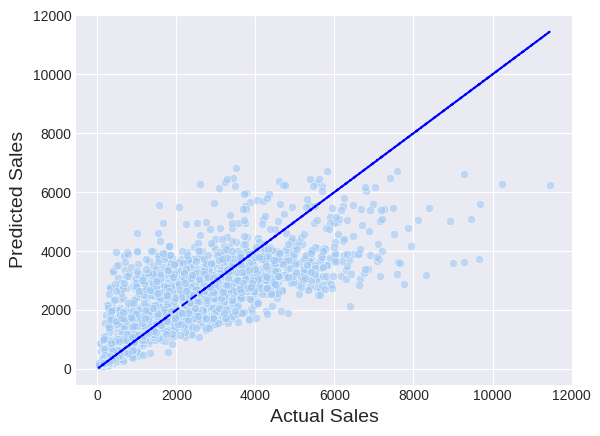

In [ ]:
sns.scatterplot(x=reg_y_test, y=rf_pred_test, alpha=0.6)
plt.plot(reg_y_test, reg_y_test, color='blue', linestyle='--')  # Plotting the diagonal line
plt.xlabel('Actual Sales', fontsize=14)
plt.ylabel('Predicted Sales', fontsize=14)
plt.show()

In [ ]:
# Evaluate the model with best parameters on the test set
test_score = best_reg_rf.score(reg_X_test, reg_y_test)
print("Test Score:", test_score)

Test Score: 0.5930690984273809


In [ ]:
# Calculate the RMSE of train set
rf_mse_train = round(mean_squared_error(reg_y_train, rf_pred_train), 4)
rf_rmse_train = round(np.sqrt(rf_mse_train), 4)

# Calculate the RMSE of test set
rf_mse_test = round(mean_squared_error(reg_y_test, rf_pred_test), 4)
rf_rmse_test = round(np.sqrt(rf_mse_test), 4)

print("RMSE of train set in Random Forest Regression:", rf_rmse_train)
print("RMSE of test set in Random Forest Regression:", rf_rmse_test)

RMSE of train set in Random Forest Regression: 917.6079
RMSE of test set in Random Forest Regression: 1067.6192


# Feature Importance

In [ ]:
features = list(reg_X.columns)
features

['Item_Weight',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Years_Since_Establishment']

In [ ]:
RF_Regressor = random_search.best_estimator_
RF_Regressor.fit(reg_X_train, reg_y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=2,
                      n_estimators=200, random_state=42)

In [ ]:
importance = RF_Regressor.feature_importances_
importance

array([0.04588648, 0.06724776, 0.03003099, 0.51123937, 0.03510116,
       0.02657037, 0.21044257, 0.0734813 ])

In [ ]:
FIM = pd.DataFrame({'Features': reg_X_train.columns , 'Feature_importance':importance})
FIM = FIM.sort_values(by=['Feature_importance'])
FIM

,Features,Feature_importance
5,Outlet_Location_Type,0.026570
2,Item_Type,0.030031
4,Outlet_Size,0.035101
0,Item_Weight,0.045886
1,Item_Visibility,0.067248
7,Years_Since_Establishment,0.073481
6,Outlet_Type,0.210443
3,Item_MRP,0.511239


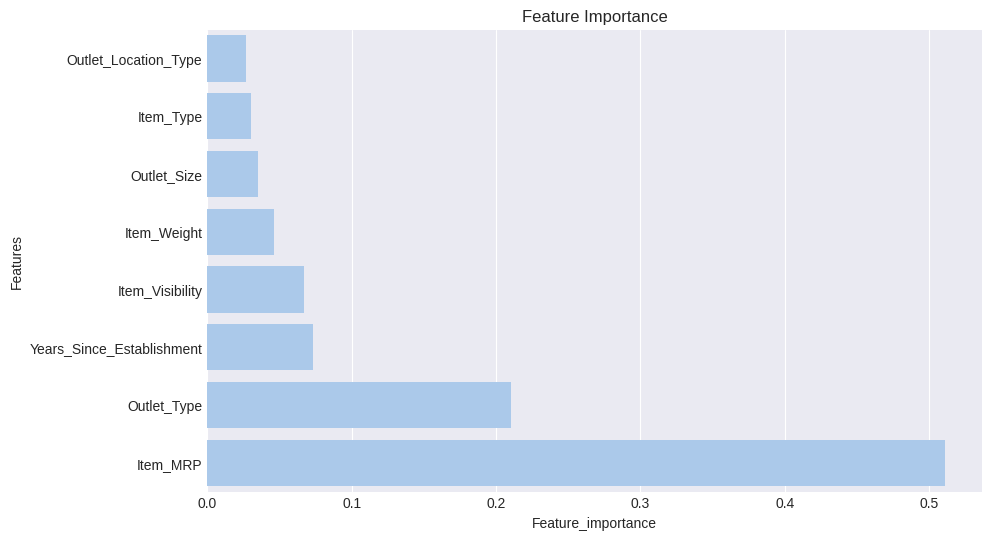

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(y='Features', x='Feature_importance', data=FIM)
plt.show()

# Does the important feature mean more significant?

In [ ]:
# With statsmodels, we need to mannually add a constant to our dataset!
X_test_wc = sm.add_constant(reg_X_test)
X_train_wc = sm.add_constant(reg_X_train)

In [ ]:
# Fit the model
model = sm.OLS(reg_y_train,X_train_wc)
statsmodels_reg= model.fit()

In [ ]:
statsmodels_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     733.1
Date:                Sat, 30 Mar 2024   Prob (F-statistic):               0.00
Time:                        17:39:08   Log-Likelihood:                -50867.
No. Observations:                5966   AIC:                         1.018e+05
Df Residuals:                    5957   BIC:                         1.018e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      -745.6576    113.892     -6.547      0.000    -968.927    -522.389
Item_Weight                  -1.8157      3.755     -0.484      0.629      -9.176       5.545
Item_Visibility           -2062.2437    317.930     -6.486      0.000   -2685.502   -1438.985
Item_Type                    -0.1923      3.788     -0.051      0.960      -7.617       7.233
Item_MRP                     15.7722      0.253     62.392      0.000      15.277      16.268
Outlet_Size                 -21.6249     20.247     -1.068      0.286     -61.316      18.066
Outlet_Location_Type       -256.5354     22.290    -11.509      0.000    -300.231    -212.839
Outlet_Type                 942.2359     24.307     38.765      0.000     894.586     989.886
Years_Since_Establishment     2.3699      2.164      1.095      0.274      -1.873       6.613
==============================================================================
Omnibus:                      508.784   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              991.960
Skew:                           0.578   Prob(JB):                    3.97e-216
Kurtosis:                       4.629   Cond. No.                     3.17e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Classification

In [53]:
data.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Since_Establishment
0,9.30,0.016047,4,249.8092,1,0,1,3735.1380,24
1,5.92,0.019278,14,48.2692,1,2,2,443.4228,14
2,17.50,0.016760,10,141.6180,1,0,1,2097.2700,24
3,19.20,0.000000,6,182.0950,3,2,0,732.3800,25
4,8.93,0.000000,9,53.8614,0,2,1,994.7052,36


In [54]:
data['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [55]:
# Define the quartiles for categorization
q1 = data['Item_Outlet_Sales'].describe()['25%']
q2 = data['Item_Outlet_Sales'].describe()['50%']
q3 = data['Item_Outlet_Sales'].describe()['75%']

# Define the bins for categorization
bins = [-float('inf'), q1, q2, q3, float('inf')]
# Using -inf and inf to cover all possible values

# Define the labels for the bins
labels = ['Q1', 'Q2', 'Q3', 'Q4']

# Use pd.cut() to categorize the data into four quartiles
sales_categories = pd.cut(data['Item_Outlet_Sales'], bins=bins, labels=labels)

# Replace the original column with the categorized values
data['Sales_Category'] = sales_categories

# Display the first few rows to verify the categorization
print(data[['Item_Outlet_Sales', 'Sales_Category']].head())

   Item_Outlet_Sales Sales_Category
0          3735.1380             Q4
1           443.4228             Q1
2          2097.2700             Q3
3           732.3800             Q1
4           994.7052             Q2


In [56]:
# Encode the data
data['Sales_Category'] = le.fit_transform(data['Sales_Category'])

In [57]:
pd.crosstab(data['Sales_Category'],data['Sales_Category'], normalize='all')*100

Sales_Category,0,1,2,3
Sales_Category,,,,
0,25.002933,0.000000,0.0000,0.000000
1,0.000000,25.038132,0.0000,0.000000
2,0.000000,0.000000,24.9912,0.000000
3,0.000000,0.000000,0.0000,24.967734


In [58]:
# Defining the variable
cls_X=data.drop(columns=['Sales_Category', 'Item_Outlet_Sales'],axis=1)

cls_y=data['Sales_Category']

# Convert target variable to string
# cls_y = cls_y.astype(str)

In [59]:
#Split the data into train set and test set
cls_X_train, cls_X_test, cls_y_train, cls_y_test = train_test_split(cls_X, cls_y, test_size=0.3, random_state=42)

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Visibility            8523 non-null   float64
 2   Item_Type                  8523 non-null   int64  
 3   Item_MRP                   8523 non-null   float64
 4   Outlet_Size                8523 non-null   int64  
 5   Outlet_Location_Type       8523 non-null   int64  
 6   Outlet_Type                8523 non-null   int64  
 7   Item_Outlet_Sales          8523 non-null   float64
 8   Years_Since_Establishment  8523 non-null   int64  
 9   Sales_Category             8523 non-null   int64  
dtypes: float64(4), int64(6)
memory usage: 666.0 KB


# Logistic Regression

In [86]:
# Logistic Regression
# Fitting Logistic to the Training set
cls_lr = LogisticRegression(solver = 'liblinear', C = 0.5)
cls_lr.fit(cls_X_train, cls_y_train)

LogisticRegression(C=0.5, solver='liblinear')

In [87]:
# Predicting the test set
lr_pred = cls_lr.predict(cls_X_test)

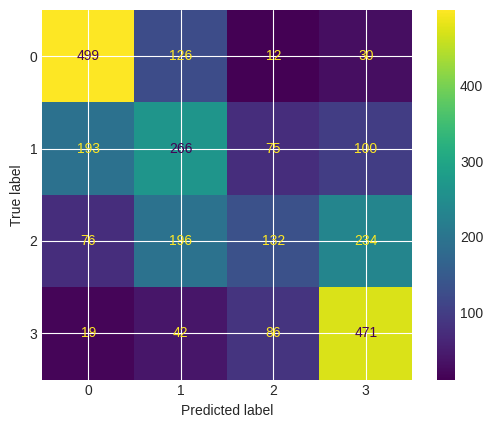

In [88]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(cls_y_test,lr_pred)
disp = ConfusionMatrixDisplay(confusion_matrix= cm)
disp.plot()

In [89]:
print(classification_report(cls_y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.63      0.75      0.69       667
           1       0.42      0.42      0.42       634
           2       0.43      0.21      0.28       638
           3       0.56      0.76      0.65       618

    accuracy                           0.54      2557
   macro avg       0.51      0.53      0.51      2557
weighted avg       0.51      0.54      0.51      2557



In [90]:
# Evaluate the model
accuracy = round(accuracy_score(cls_y_test,lr_pred) ,4)
precision = round(precision_score(cls_y_test,lr_pred, average ='macro'),4)
recall = round(recall_score(cls_y_test,lr_pred, average ='macro'),4)
f1score = round(f1_score(cls_y_test,lr_pred, average ='macro'),4)

print('Accuracy  = {}'.format(accuracy))
print('Precision = {}'.format(precision))
print('Recall    = {}'.format(recall))
print('f1_score  = {}'.format(f1score))

Accuracy  = 0.535
Precision = 0.5133
Recall    = 0.5342
f1_score  = 0.5089


# Support Vector Machine Classification (SVM)

Feature Scaling is required in SVM

In [ ]:
# Feature Scaling
scaler = StandardScaler()

cls_svc_X_train = scaler.fit_transform(cls_X_train)
cls_svc_X_test = scaler.transform(cls_X_test)

cls_svc_y_train = cls_y_train
cls_svc_y_test = cls_y_test

In [ ]:
# SVM Classifier
# Fitting SVM Classifier to the Training set
cls_svc=SVC(C = 0.5, kernel = 'rbf')
cls_svc.fit(cls_svc_X_train, cls_svc_y_train)

SVC(C=0.5)

In [ ]:
# Predicting the test set
svc_pred = cls_svc.predict(cls_svc_X_test)

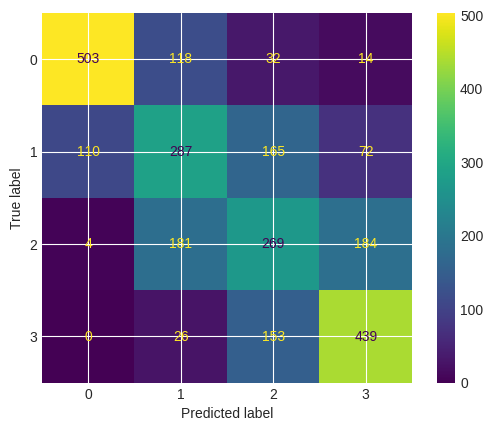

In [ ]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(cls_svc_y_test,svc_pred)
disp = ConfusionMatrixDisplay(confusion_matrix= cm)
disp.plot()

In [ ]:
print(classification_report(cls_svc_y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78       667
           1       0.47      0.45      0.46       634
           2       0.43      0.42      0.43       638
           3       0.62      0.71      0.66       618

    accuracy                           0.59      2557
   macro avg       0.58      0.58      0.58      2557
weighted avg       0.59      0.59      0.59      2557



In [ ]:
# Evaluate the model
accuracy = round(accuracy_score(cls_svc_y_test,svc_pred) ,4)
precision = round(precision_score(cls_svc_y_test,svc_pred, average ='macro'),4)
recall = round(recall_score(cls_svc_y_test,svc_pred, average ='macro'),4)
f1score = round(f1_score(cls_svc_y_test,svc_pred, average ='macro'),4)

print('Accuracy  = {}'.format(accuracy))
print('Precision = {}'.format(precision))
print('Recall    = {}'.format(recall))
print('f1_score  = {}'.format(f1score))

Accuracy  = 0.5858
Precision = 0.5845
Recall    = 0.5847
f1_score  = 0.5835


# Random Forest Classification

Feature Scaling - no need to scale feature for random forest

In [ ]:
# Random Forest Classification
# Fitting RF Classifier to the Training set
cls_rf = RandomForestClassifier(n_estimators=200, random_state=42)
cls_rf.fit(cls_X_train, cls_y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
# Predicting the test set
rf_pred = cls_rf.predict(cls_X_test)

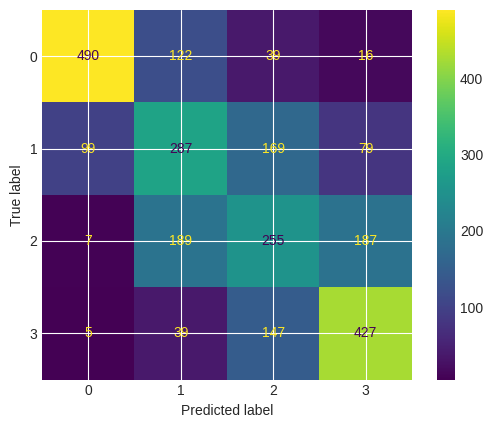

In [ ]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(cls_y_test,rf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix= cm)
disp.plot()

In [ ]:
print(classification_report(cls_y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.82      0.73      0.77       667
           1       0.45      0.45      0.45       634
           2       0.42      0.40      0.41       638
           3       0.60      0.69      0.64       618

    accuracy                           0.57      2557
   macro avg       0.57      0.57      0.57      2557
weighted avg       0.57      0.57      0.57      2557



In [ ]:
# Evaluate the model
accuracy = round(accuracy_score(cls_y_test,rf_pred) ,4)
precision = round(precision_score(cls_y_test,rf_pred, average ='macro'),4)
recall = round(recall_score(cls_y_test,rf_pred, average ='macro'),4)
f1score = round(f1_score(cls_y_test,rf_pred, average ='macro'),4)

print('Accuracy  = {}'.format(accuracy))
print('Precision = {}'.format(precision))
print('Recall    = {}'.format(recall))
print('f1_score  = {}'.format(f1score))

Accuracy  = 0.5706
Precision = 0.5715
Recall    = 0.5695
f1_score  = 0.5692


In [ ]:
print(cm)

[[490 122  39  16]
 [ 99 287 169  79]
 [  7 189 255 187]
 [  5  39 147 427]]


#XGBoost Classification

In [61]:
# Fit the model to the training data
# (random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
# 'n_estimators': 150, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.3, 'colsample_bytree': 1.0
cls_xgb = XGBClassifier(random_state=42)
cls_xgb.fit(cls_X_train, cls_y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [62]:
# Predicting the test set
xgb_pred = cls_xgb.predict(cls_X_test)

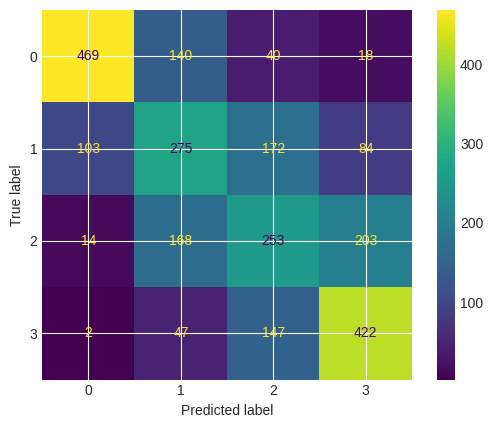

In [63]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(cls_y_test,xgb_pred)
disp = ConfusionMatrixDisplay(confusion_matrix= cm)
disp.plot()

In [64]:
print(classification_report(cls_y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.80      0.70      0.75       667
           1       0.44      0.43      0.44       634
           2       0.41      0.40      0.40       638
           3       0.58      0.68      0.63       618

    accuracy                           0.55      2557
   macro avg       0.56      0.55      0.55      2557
weighted avg       0.56      0.55      0.56      2557



In [65]:
# Evaluate the model
accuracy = round(accuracy_score(cls_y_test,xgb_pred) ,4)
precision = round(precision_score(cls_y_test,xgb_pred, average ='macro'),4)
recall = round(recall_score(cls_y_test,xgb_pred, average ='macro'),4)
f1score = round(f1_score(cls_y_test,xgb_pred, average ='macro'),4)

print('Accuracy  = {}'.format(accuracy))
print('Precision = {}'.format(precision))
print('Recall    = {}'.format(recall))
print('f1_score  = {}'.format(f1score))

Accuracy  = 0.5549
Precision = 0.557
Recall    = 0.5541
f1_score  = 0.5537


In [66]:
# Get feature importances
feature_importances = cls_xgb.feature_importances_

In [78]:
# Create a DataFrame to store feature importances and corresponding feature names
feature_importance_df = pd.DataFrame({'Feature': cls_X_train.columns, 'Importance': feature_importances})

# Sort the feature importances
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print visualize the sorted feature importances
print(feature_importance_df)

                     Feature  Importance
6                Outlet_Type    0.645197
3                   Item_MRP    0.117005
7  Years_Since_Establishment    0.041704
0                Item_Weight    0.040615
1            Item_Visibility    0.040491
4                Outlet_Size    0.038714
5       Outlet_Location_Type    0.038213
2                  Item_Type    0.038061


# Tuning Hyperparameter - XGBoost Classifier

In [68]:
# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]

}

# Initialize the XGBoost classifier
cls_xgb = XGBClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=cls_xgb, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

# Perform grid search
grid_search.fit(cls_X_train, cls_y_train)

Fitting 5 folds for each of 2187 candidates, totalling 10935 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0, 0.1, 0.3],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='accuracy', verbose=2)

In [69]:
# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.6}


In [70]:
# Evaluate the model with best parameters on the test set
best_cls_xgb = grid_search.best_estimator_

#Make Prediction
xgb_pred = grid_search.predict(cls_X_test)

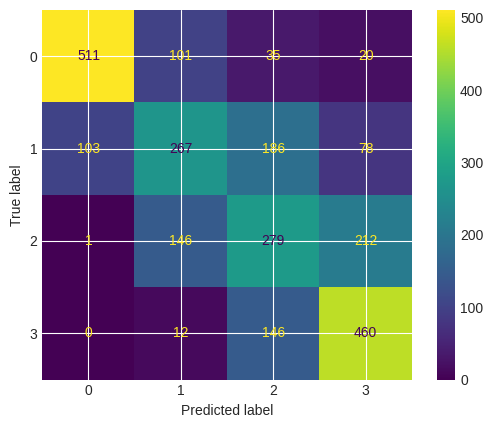

In [71]:
# Plot the confusion matrix
cm = confusion_matrix(cls_y_test,xgb_pred)
disp = ConfusionMatrixDisplay(confusion_matrix= cm)
disp.plot()

In [72]:
print(classification_report(cls_y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       667
           1       0.51      0.42      0.46       634
           2       0.43      0.44      0.43       638
           3       0.60      0.74      0.66       618

    accuracy                           0.59      2557
   macro avg       0.59      0.59      0.59      2557
weighted avg       0.59      0.59      0.59      2557



In [73]:
# Evaluate the model
accuracy = round(accuracy_score(cls_y_test,xgb_pred) ,4)
precision = round(precision_score(cls_y_test,xgb_pred, average ='macro'),4)
recall = round(recall_score(cls_y_test,xgb_pred, average ='macro'),4)
f1score = round(f1_score(cls_y_test,xgb_pred, average ='macro'),4)

print('Accuracy  = {}'.format(accuracy))
print('Precision = {}'.format(precision))
print('Recall    = {}'.format(recall))
print('f1_score  = {}'.format(f1score))

Accuracy  = 0.5933
Precision = 0.5919
Recall    = 0.5922
f1_score  = 0.5887


# Overall Performance for Classification

<function matplotlib.pyplot.show(close=None, block=None)>

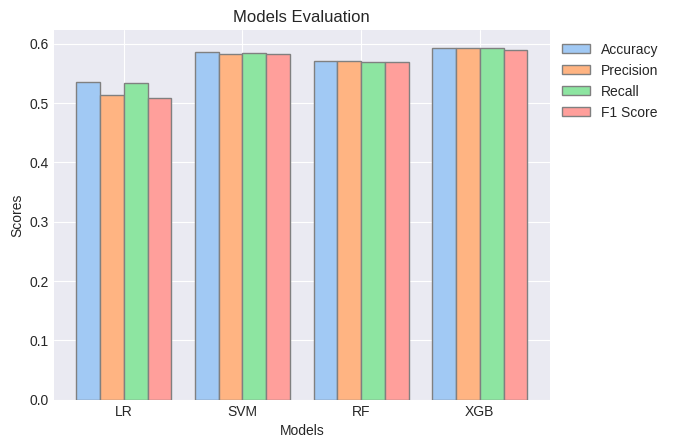

In [51]:
# Data
models = ['LR', 'SVM', 'RF', 'XGB']
metrics = {
    'Accuracy': [0.535, 0.5858, 0.5706, 0.5933],
    'Precision': [0.5133, 0.5825, 0.5715, 0.5919],
    'Recall': [0.5342, 0.5846, 0.5695, 0.5922],
    'F1 Score': [0.5089, 0.5822, 0.5692, 0.5887]
}

n_models = len(models)
ind = np.arange(n_models) # the x locations for the groups
width = 0.2
edge_color = 'grey'

fig, ax = plt.subplots()

for i, (metric, values) in enumerate(metrics.items()):
  ax.bar(ind + i*width, values, width, label=metric, edgecolor = edge_color)

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Models Evaluation')
ax.set_xticks(ind + width * 1.5)
ax.set_xticklabels(models)
ax.legend(loc = 'upper left', bbox_to_anchor = (1, 1))

plt.show